In [1]:
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

iris = sns.load_dataset('penguins')
df = pd.DataFrame(iris)

print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [2]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [3]:
df["species"] = df["species"].map({'Adelie':0,'Chinstrap':1,'Gentoo':2})

In [4]:
df["island"] = df["island"].map({'Torgersen':0,'Biscoe':1,'Dream':2})
df["sex"] = df["sex"].map({'Male':0,'Female':1})

In [5]:
df = df.dropna()

In [6]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0.0
1,0,0,39.5,17.4,186.0,3800.0,1.0
2,0,0,40.3,18.0,195.0,3250.0,1.0
4,0,0,36.7,19.3,193.0,3450.0,1.0
5,0,0,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,1.0
340,2,1,46.8,14.3,215.0,4850.0,1.0
341,2,1,50.4,15.7,222.0,5750.0,0.0
342,2,1,45.2,14.8,212.0,5200.0,1.0


In [33]:
X = df.drop(["species"],axis=1).values

In [34]:
X

array([[0.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00],
       [0.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00],
       [0.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00],
       ...,
       [1.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 0.00e+00],
       [1.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00],
       [1.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 0.00e+00]])

In [9]:
y = df["species"].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [11]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [12]:
X_train

tensor([[2.0000e+00, 4.5700e+01, 1.7300e+01, 1.9300e+02, 3.6000e+03, 1.0000e+00],
        [0.0000e+00, 3.4400e+01, 1.8400e+01, 1.8400e+02, 3.3250e+03, 1.0000e+00],
        [1.0000e+00, 4.2700e+01, 1.3700e+01, 2.0800e+02, 3.9500e+03, 1.0000e+00],
        ...,
        [2.0000e+00, 4.6600e+01, 1.7800e+01, 1.9300e+02, 3.8000e+03, 1.0000e+00],
        [2.0000e+00, 3.9700e+01, 1.7900e+01, 1.9300e+02, 4.2500e+03, 0.0000e+00],
        [1.0000e+00, 4.5100e+01, 1.4500e+01, 2.0700e+02, 5.0500e+03, 1.0000e+00]])

In [13]:
class NeuralNetworkClassificationModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(NeuralNetworkClassificationModel,self).__init__()
        self.input_layer    = nn.Linear(input_dim,50)
        self.hidden_layer1  = nn.Linear(50,60)
        self.output_layer   = nn.Linear(60,output_dim)
        self.relu = nn.ReLU()
        self.tan = nn.Tanh()
    
    
    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

In [14]:
input_dim  = 6 
output_dim = 3
model = NeuralNetworkClassificationModel(input_dim,output_dim)


In [15]:
learning_rate = 0.0005
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [16]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        


        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [17]:
num_epochs = 2000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [18]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/2000, Train Loss: 1.2574, Test Loss: 1.5381
Epoch 100/2000, Train Loss: 0.8711, Test Loss: 0.8256
Epoch 150/2000, Train Loss: 0.7905, Test Loss: 0.7633
Epoch 200/2000, Train Loss: 0.7329, Test Loss: 0.7118
Epoch 250/2000, Train Loss: 0.6918, Test Loss: 0.6747
Epoch 300/2000, Train Loss: 0.6620, Test Loss: 0.6478
Epoch 350/2000, Train Loss: 0.6386, Test Loss: 0.6262
Epoch 400/2000, Train Loss: 0.6180, Test Loss: 0.6067
Epoch 450/2000, Train Loss: 0.5987, Test Loss: 0.5879
Epoch 500/2000, Train Loss: 0.6098, Test Loss: 0.6288
Epoch 550/2000, Train Loss: 0.5830, Test Loss: 0.5957
Epoch 600/2000, Train Loss: 0.5799, Test Loss: 0.6021
Epoch 650/2000, Train Loss: 0.5545, Test Loss: 0.5836
Epoch 700/2000, Train Loss: 3.7884, Test Loss: 5.7535
Epoch 750/2000, Train Loss: 0.7203, Test Loss: 1.9448
Epoch 800/2000, Train Loss: 1.2508, Test Loss: 0.8250
Epoch 850/2000, Train Loss: 0.5332, Test Loss: 0.5770
Epoch 900/2000, Train Loss: 0.6701, Test Loss: 0.4445
Epoch 950/2000, Train Loss: 0

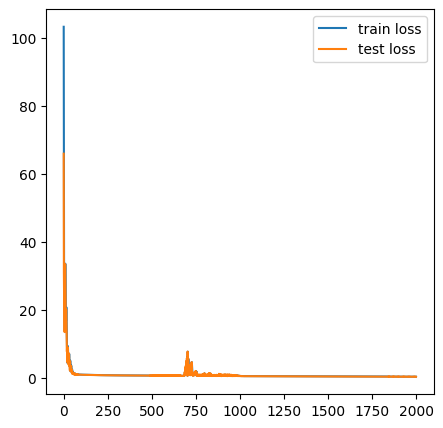

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5,5))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [20]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [21]:
def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [22]:
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)

In [23]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 94.779
Test Accuracy: 100.0


In [24]:
a = torch.argmax(model(X_train[101]))
a

tensor(0)

In [25]:
y_train[101]

tensor(2)

In [26]:
out ={0: 'Adelie',1 : 'Chinstrap',2: 'Gentoo'}

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [28]:
device

device(type='cuda')

In [29]:
torch.save(model.state_dict(),"penguin.pth")

In [30]:
X_train[101]

tensor([1.0000e+00, 4.2000e+01, 1.3500e+01, 2.1000e+02, 4.1500e+03, 1.0000e+00])

In [38]:
species_mapping = {0:'Adelie',1:'Chinstrap',2:'Gentoo'}
species = species_mapping.get(0)

In [39]:
species

'Adelie'